# Introduction

This notebook was written by Janine George (E-mail: [janine.george@uclouvain.be](mailto:janine.george@uclouvain.be) Université catholique de Louvain, [https://jageo.github.io/](https://jageo.github.io/)).

This notebook shows how to plot Crystal Orbital Hamilton Population (COHP) and projected densities of states calculated with the Local-Orbital Basis Suite Towards Electronic-Structure Reconstruction (LOBSTER) code. Furtheremore, the classes Icohplist and Charge to evaluate ICOHPLIST.lobster and CHARGE.lobster are explained. See http://www.cohp.de for more information. The code to plot COHP and evaluate ICOHPLIST.lobster in pymatgen was started Marco Esters and Anubhav Jain and extended by Janine George. The classes to plot DOSCAR.lobster, and to evaluate CHARGE.lobster were written by Janine George.

Written using:
- pymatgen==2019.1.13

# How to plot COHPCAR.lobster

## get relevant classes

In [1]:
from pymatgen.electronic_structure.plotter import CohpPlotter
from pymatgen.electronic_structure.cohp import  CompleteCohp
%matplotlib inline

## get a completecohp object to simplify the plotting

In [2]:
COHPCAR_path = "lobster_data/COHPCAR.lobster"
POSCAR_path = "lobster_data/POSCAR"

completecohp=CompleteCohp.from_file(fmt="LOBSTER",filename=COHPCAR_path,structure_file=POSCAR_path)

## plot certain COHP
You have to search for the label of the COHP you would like to plot in ICOHPLIST.lobster

This is a COHP between the following sites: [0. 0. 0.] Li and [3.37750738 0.         0.57492567] O


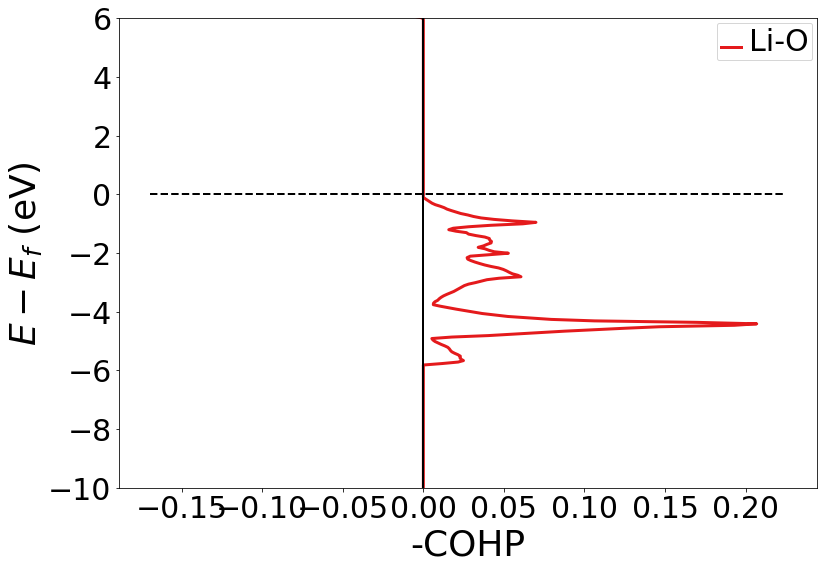

In [3]:
#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
label="13"
cp=CohpPlotter()
#get a nicer plot label
plotlabel=str(completecohp.bonds[label]['sites'][0].species_string)+'-'+str(completecohp.bonds[label]['sites'][1].species_string)

cp.add_cohp(plotlabel,completecohp.get_cohp_by_label(label=label))
#check which COHP you are plotting

print("This is a COHP between the following sites: "+str(completecohp.bonds[label]['sites'][0])+' and '+ str(completecohp.bonds[label]['sites'][1]))

x = cp.get_plot(integrated=False)
x.ylim([-10, 6])

x.show()

## focus on certain orbitals only

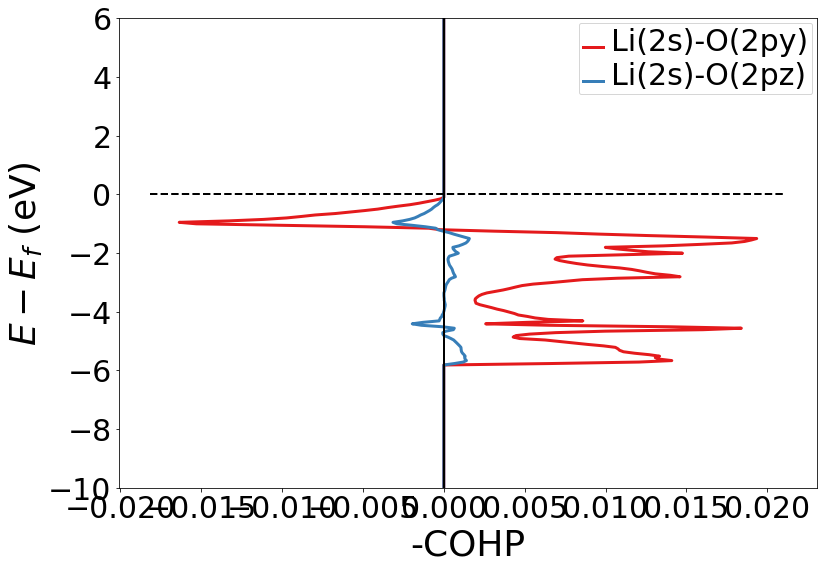

In [4]:
#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
label="13"
cp=CohpPlotter()

#get orbital object
from pymatgen.electronic_structure.core import Orbital

#interaction between 2s and 2px
orbitals=[[2,Orbital.s], [2,Orbital.py]]
orbitals2=[[2,Orbital.s], [2,Orbital.pz]]
#get a nicer plot label

plotlabel=str(completecohp.bonds[label]['sites'][0].species_string)+'(2s)'+'-'+str(completecohp.bonds[label]['sites'][1].species_string)+'(2py)'
plotlabel2=str(completecohp.bonds[label]['sites'][0].species_string)+'(2s)'+'-'+str(completecohp.bonds[label]['sites'][1].species_string)+'(2pz)'

cp.add_cohp(plotlabel,completecohp.get_orbital_resolved_cohp(label=label, orbitals=orbitals))
cp.add_cohp(plotlabel2,completecohp.get_orbital_resolved_cohp(label=label, orbitals=orbitals2))
#check which COHP you are plotting

#with integrated=True, you can plot the integrated COHP
x = cp.get_plot(integrated=False)
x.ylim([-10, 6])

x.show()


# How to evaluate ICOHPLIST.lobster

## get relevant classes

In [5]:
from pymatgen.io.lobster import Icohplist

## read in ICOHPLIST.lobster and get Icohpcollection object

In [6]:
icohplist=Icohplist(filename='lobster_data/ICOHPLIST.lobster')
icohpcollection=icohplist.icohpcollection

## get interesting properties from ICOHPLIST.lobster 

In [7]:
#get icohp value by label (labelling according to ICOHPLIST.lobster)
#for spin polarized calculations you can also sum the spin channels
print('icohp value for certain bond by label')
label='13'
print(icohpcollection.get_icohp_by_label(label))
print()
#you can get all Icohpvalue objects for certain bond lengths
print('Icohp values for certain bonds with certain bond lengths')
for key,icohp in icohpcollection.get_icohp_dict_by_bondlengths(minbondlength=0.0, maxbondlength=2.0).items():
    print(key+':'+str(icohp.icohp))
print()
#you can get all icohps for a certain site
print('ICOHP values of certain site')
for key,icohp in (icohpcollection.get_icohp_dict_of_certain_site(site=0,minbondlength=0.0, maxbondlength=3.0).items()):
    print(key+':'+str(icohp.icohp))


icohp value for certain bond by label
-0.45145

Icohp values for certain bonds with certain bond lengths
26:{<Spin.up: 1>: -4.3373}
27:{<Spin.up: 1>: -4.33584}
29:{<Spin.up: 1>: -4.33891}
28:{<Spin.up: 1>: -4.33857}
30:{<Spin.up: 1>: -4.37145}
25:{<Spin.up: 1>: -4.36671}

ICOHP values of certain site
2:{<Spin.up: 1>: -0.04785}
18:{<Spin.up: 1>: -0.45682}
1:{<Spin.up: 1>: -0.04785}
17:{<Spin.up: 1>: -0.45685}
14:{<Spin.up: 1>: -0.4515}
8:{<Spin.up: 1>: -0.14625}
13:{<Spin.up: 1>: -0.45145}
3:{<Spin.up: 1>: -0.04785}
5:{<Spin.up: 1>: -0.04785}
7:{<Spin.up: 1>: -0.14622}
9:{<Spin.up: 1>: -0.14465}
6:{<Spin.up: 1>: -0.04785}
12:{<Spin.up: 1>: -0.14435}
10:{<Spin.up: 1>: -0.1465}
4:{<Spin.up: 1>: -0.04785}
15:{<Spin.up: 1>: -0.45212}
11:{<Spin.up: 1>: -0.14441}
16:{<Spin.up: 1>: -0.45749}


# How to plot DOSCAR.lobster:

## get relevant classes

In [8]:
#relevant classes
from pymatgen.io.lobster import Doscar
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.core.composition import Element
%matplotlib inline


## read in DOSCAR.lobster and get structure object for later

In [9]:
#read in DOSCAR.lobster
doscar=Doscar(doscar="lobster_data/DOSCAR.lobster",vasprun="lobster_data/vasprun.xml")
complete_dos=doscar.completedos
#get structure object
structure=complete_dos.structure


## plot total density of states

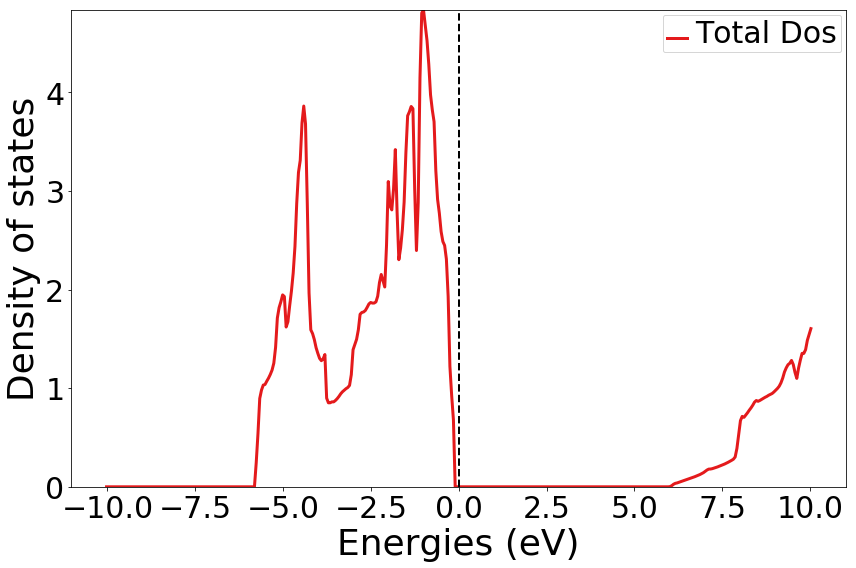

In [10]:
#plot total dos
Plotter=DosPlotter()
Plotter.add_dos("Total Dos",doscar.tdos)
Plotter.get_plot().show()

## plot DOS projected on s, p, and d orbitals for certain element

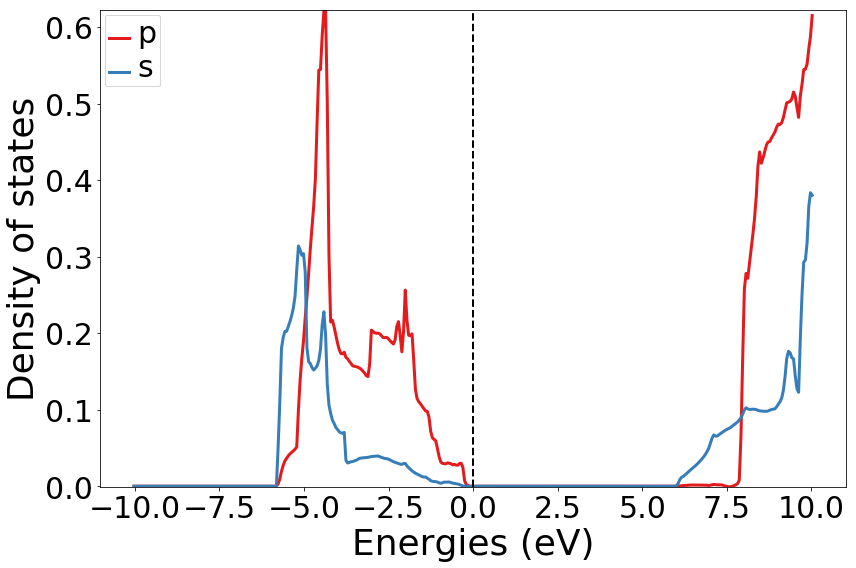

In [11]:
#plot DOS of s,p, and d orbitals for certain element
Plotter=DosPlotter()
el=Element("Al")
Plotter.add_dos_dict(complete_dos.get_element_spd_dos(el=el))
Plotter.get_plot().show()

## plot DOS for cetain sites and orbitals

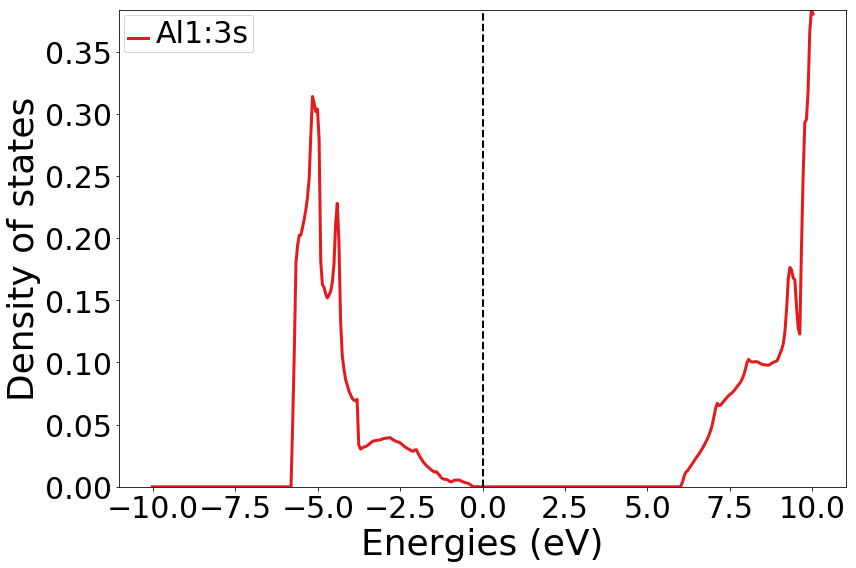

In [12]:
Plotter=DosPlotter()
#choose the sites you would like to plot
for isite,site in enumerate(structure[1:2]):
  #name the orbitals you would like to include
  #the other orbitals are named in a similar way. The orbitals are called: "s", "p_y", "p_z", "p_x", "d_xy", "d_yz", "d_z^2","d_xz", "d_x^2-y^2", "f_y(3x^2-y^2)", "f_xyz","f_yz^2", "f_z^3", "f_xz^2", "f_z(x^2-y^2)", "f_x(x^2-3y^2)"
  for orbital in ["3s"]:
      Plotter.add_dos("Al"+str(isite+1)+":"+orbital,complete_dos.get_site_orbital_dos(site,orbital))
Plotter.get_plot().show()

# evaluate CHARGE.lobster 

## get relevant classes

In [13]:
from pymatgen.io.lobster import Charge

## read in charge and produce a structure with the charge as a property

In [14]:
charge=Charge(filename='lobster_data/CHARGE.lobster')
newstructure=charge.get_structure_with_charges(structure_filename='lobster_data/POSCAR')
print(newstructure)

Full Formula (Li1 Al1 O2)
Reduced Formula: LiAlO2
abc   :   5.066387   5.066387   5.066387
angles:  32.413237  32.413237  32.413240
Sites (4)
  #  SP           a         b         c    Loewdin Charges    Mulliken Charges
---  ----  --------  --------  --------  -----------------  ------------------
  0  Li    0         0         0                      0.73                0.87
  1  Al    0.5       0.5       0.5                    1.02                1.18
  2  O     0.238118  0.238118  0.238118              -0.89               -1.01
  3  O     0.761882  0.761882  0.761882              -0.89               -1.01
